<a href="https://colab.research.google.com/github/OmamoMoses/Python_Sample1/blob/main/SAMPLE_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**COLLEGE OF SCIENCE AND ENGINEERING**

#**SCHOOL OF COMPUTER SCIENCE AND ENGINEERING**

#**ASSESSMENT**

## A.**EXPLORING THE DATASET USING PANDAS**

In this phase, we dive into the data, aiming to understand its characteristics, uncover potential trends, and identify anomalies.

The primary objective is to gain a comprehensive overview of the dataset's structure, distributions, and relationships between variables. This process involves employing statistical summaries, visualizations, and various exploratory techniques to reveal hidden patterns, outliers, and correlations.

**IMPORT THE NECESSARY LIBLARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression,Ridge, RidgeCV, Lasso, LassoCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV,train_test_split, cross_val_score, KFold

from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from mlxtend.feature_selection import SequentialFeatureSelector





#A1.Introducing the Houses Price Dataset.

In [ ]:
# We seek to conduct investigation on the house prices data saved as house_data.csv.
# We therefore load the dataset file as the data file(Df) and peek into the first 10 rows and collumn heads.

Df = pd.read_csv('house_data.csv')
Df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In the market of real estate, the provided dataset becomes a treasure of information, offering a nuanced perspective on the housing market. Comprising 21 columns, each representing a distinct house variable. From fundamental aspects like the number of bedrooms and bathrooms to more intricate factors such as waterfront views and overall condition, these attributes collectively contribute to a comprehensive understanding of the real estate landscape.

Delving into the specifics, the dataset includes essential variables:


1. id: A unique numeric identifier assigned to each house being sold.
2. date: The date on which the house was sold.
3. price: The target variable, representing the price of the house (the variable that is to be predicted).
4. bedrooms: The number of bedrooms in the house.
5. bathrooms: The number of bathrooms in the house.
6. sqft_living: The measurement of the house in square feet.
7. sqft_lot: The measurement of the lot in square feet.
8. floors: The total number of floors (levels) in the house.
9. waterfront: A binary feature indicating whether the house has a waterfront.
10. view (0 means no, 1 means yes). A binary feature indicating whether the house has been viewed (0 means no, 1 means yes).
11. condition: The overall condition of the house on a scale of 1 to 5.
12. grade: The overall grade given to the housing unit based on the King County grading system on a scale of 1 to 11.
13. sqft_above: The square footage of the house excluding the basement.
14. sqft_basement: The square footage of the basement of the house.
15. yr_built: The year in which the house was built.
16. yr_renovated: The year in which the house was renovated.
17. zipcode: The zipcode of the location of the house.
18. lat: The latitude of the location of the house.
19. long: The longitude of the location of the house.
20. sqft_living15: The living room area in 2015 (implying some renovations).
21. sqft_lot15: The lot size area in 2015 (implying some renovations).


As we embark on the journey of data exploration, these variables stand as the pillars supporting the extraction of meaningful insights, guiding us toward a predictive analytics model that can unravel the mysteries of housing prices. Join us in the exploration of this dataset, where each variable tells a unique story, and patterns emerge as key indicators in deciphering the dynamics of the housing market.








# A2. SUMMARY OF HOUSES DATA
Lets explore details of the dataset by providing a summary of the dataset variables , including descriptive statistics and data visualizations such as histograms and scatterplots to gain insight into the data.

In [ ]:
# We quickly assess the structure of our DataFrame, identify potential data type issues, and checking for missing values.
Df.info()
missing_variables = Df.isnull().sum()
missing_variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

The DataFrame appears to be clean with no missing values.

It contains a mix of numerical (Float64: 5 Columns (price, bathrooms, floors, lat, long) and Int64: 15 Columns:(e.g., id, bedrooms, sqft_living, yr_built) and one categorical (object) data types. Object Columns: 1 (date).

The data types seem appropriate for the columns, but further exploration may be needed (e.g., converting date to a datetime type). The dataset represents information about real estate properties with various features such as price, number of bedrooms and bathrooms, square footage, location, etc.

***Lets look into Descriptive Statistics***

In [ ]:
# We calculate some basic statistics of the variables in the dataset.

Descriptive_statistics = Df.describe().round(3)
Descriptive_statistics

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000
mean,4.580302e+09,540088.142,3.371,2.115,2079.900,15106.968,1.494,0.008,0.234,3.409,7.657,1788.391,291.509,1971.005,84.402,98077.940,47.560,-122.214,1986.552,12768.456
std,2.876566e+09,367127.196,0.930,0.770,918.441,41420.512,0.540,0.087,0.766,0.651,1.175,828.091,442.575,29.373,401.679,53.505,0.139,0.141,685.391,27304.180
min,1.000102e+06,75000.000,0.000,0.000,290.000,520.000,1.000,0.000,0.000,1.000,1.000,290.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2.123049e+09,321950.000,3.000,1.750,1427.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3.904930e+09,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.230,1840.000,7620.000
75%,7.308900e+09,645000.000,4.000,2.500,2550.000,10688.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9.900000e+09,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


The descriptive statistics for the real estate dataset provide valuable insights into key numerical columns, offering a comprehensive view of the distribution and variation in housing-related features.

Mean (Average): The mean price of houses is approximately $540,088.1, indicating the central tendency of the dataset. Other numerical columns follow a similar pattern, representing average values across the dataset.

Standard Deviation: The standard deviation in the "price" column is approximately $367,127. This measure of dispersion highlights the extent of variability in housing prices.

Minimum Values: The minimum price of a house in the dataset is $75,000, indicating the lowest observed value. Other columns also have corresponding minimum values, representing the smallest observations.

25th Percentile (Q1): In the "price" column, 25% of houses have a price below $321,950. This percentile provides insight into the lower range of housing prices.

50th Percentile (Median or Q2): The median price is $450,000, indicating the middle value of the dataset. Half of the houses have a price below this value, and half have a price above.

75th Percentile (Q3): For the "price" column, 75% of houses have a price below $645,000. This percentile offers information on the upper range of housing prices.

Maximum Values: The maximum price of a house in the dataset is $7,700,000, representing the highest observed value. Other columns similarly display the largest values within their respective features.

This discriptive summary report provides a clear and concise overview of the central tendency, variability, and distribution of key numerical features in the real estate dataset. It is a valuable resource for understanding the price range and distribution of housing-related characteristics.


***Investigate the Relationship of Association With Price***

We will find features with the highest correlation with the target variable 'price' in a dataset, you can use the correlation coefficient. The correlation coefficient quantifies the strength and direction of a linear relationship between these two variables. In the context of a dataset, you can compute the correlation between the target variable ('price') and each of the other features.

In [ ]:
selected_variables = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','sqft_above','sqft_basement','yr_built','yr_renovated','sqft_living15','sqft_lot15']
correlation_matrix = Df[selected_variables].corr()
Correlation_vs_Price= correlation_matrix['price'].sort_values(ascending=True)
Correlation_vs_Price

yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
bedrooms         0.308350
sqft_basement    0.323816
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

* sqft_living: The correlation coefficient is approximately 0.702. This suggests a strong positive linear relationship between the living area in square feet ('sqft_living') and the price. As the living area increases, the price tends to increase as well.
* sqft_above: With a correlation coefficient of around 0.606, there is a strong positive linear relationship between the area above ground ('sqft_above') and the price.
* sqft_living15: This feature represents the living area of the nearest 15 neighbors. The correlation coefficient is approximately 0.585, indicating a strong positive linear relationship between this variable and the price.
bathrooms: The correlation coefficient is about 0.525, suggesting a moderately strong positive linear relationship between the number of bathrooms ('bathrooms') and the price.
* sqft_basement: The correlation coefficient is around 0.324, indicating a positive linear relationship between the basement area ('sqft_basement') and the price.
* bedrooms: The correlation coefficient is approximately 0.308, indicating a moderate positive linear relationship between the number of bedrooms ('bedrooms') and the price.
* yr_renovated: This feature represents the year of renovation. The correlation coefficient is about 0.126, indicating a weak positive linear relationship between the year of renovation and the price.
* sqft_lot: The correlation coefficient is around 0.090, suggesting a weak positive linear relationship between the lot area ('sqft_lot') and the price.
sqft_lot15: This feature represents the lot area of the nearest 15 neighbors. The correlation coefficient is approximately 0.082, indicating a weak positive linear relationship between this variable and the price.
* yr_built: The correlation coefficient is about 0.054, suggesting a very weak positive linear relationship between the year the house was built ('yr_built') and the price.

In summary, this correlation analysis sheds light on the linear relationships between features and house prices in the dataset. Features with higher positive correlation coefficients are positively related to prices, but the absence of negative correlation indicates a lack of clear negative linear associations. Always exercise caution in interpreting correlation as a definitive measure of causation.

It is crucial to emphasize that correlation does not imply causation. Therefore, even if a feature shows a strong positive correlation with house prices, it does not necessarily mean that changes in that feature directly cause changes in house prices. Other factors and complexities may contribute to the overall pricing dynamics.


# A.2: Vizualizations For More Insights Into the Data.

**The Relationhip Betweeen Price and the Living Area**

Since the correlation between the price of a house and the living area was the highest recorded, we further investigate this relationship.

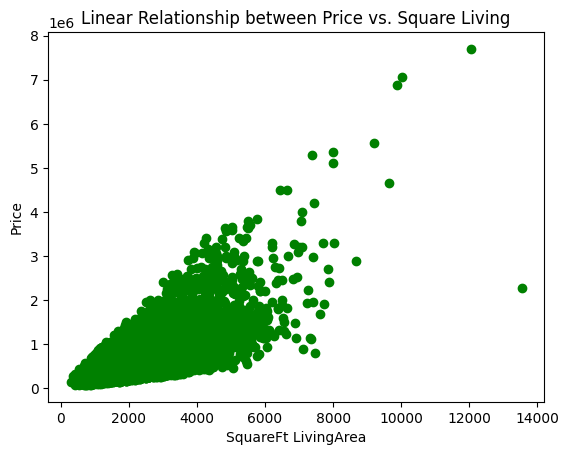

In [ ]:
plt.scatter(Df['sqft_living'], Df['price'],c='green')
plt.xlabel('SquareFt LivingArea')
plt.ylabel('Price')
plt.title('Linear Relationship between Price vs. Square Living')
plt.show()

Supporting the correlation coefficient of approximately 0.702. The plot above illustrates a strong positive linear relationship between the living area in square feet ('sqft_living') and the price. The chart clearly illustrates that as the living area in squared feet increases, the price tends to increase as well.

The plot also indicated some presence of some outliers in the dataset which would interprate as exceptional cases where houses with specific living area sizes deviated significantly.

**Distribution of Year Houses Were Built**

We further conducted analysis to describe the frequency distribution of houses based on the year they were built.

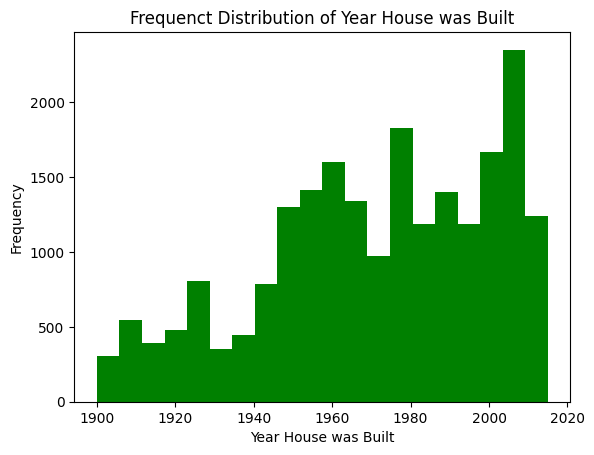

In [ ]:
#Display a histogram of the number of houses based on year the house were built.
plt.hist(Df['yr_built'],bins=20,color='green')
plt.xlabel('Year House was Built')
plt.ylabel('Frequency')
plt.title('Frequenct Distribution of Year House was Built')
plt.show()


The histogram offers a visual representation of the frequency distribution of houses according to the years in which they were developed. The left-skewed distribution, signifying that a substantial proportion of the houses falls within the latest years of the timeline,in the 20th century.Within the broader centuries trend, specific peaks or spikes may be visible, representing periods of intensified construction activity. Analyzing these peaks could unveil insights into historical events or economic conditions that prompted these pronounced upticks.

**The Houses Grading Distribution Based on the County System**

We analyse the overall grade given to the housing unit based on the King County grading system on a scale of 1 to 11.

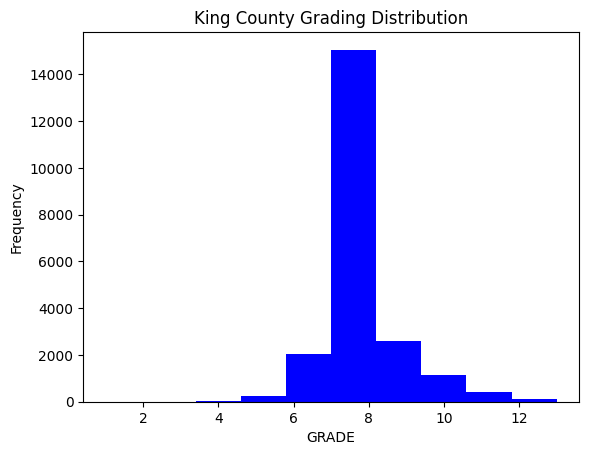

In [ ]:
#Create a histogram of grade to visualize the distribution.
plt.hist(Df['grade'],color='blue')
plt.xlabel('GRADE')
plt.ylabel('Frequency')
plt.title('King County Grading Distribution')
plt.show()


The chart illustrates that majority of houses have a grade between 7 and 9 which would represent the average grade, based on this information we can speculate that most houses are in significantly better conditions.

# B.PRE-PROSSESING DATA

#B1.We Perform any necessary pre-processing steps on the original data.


We prepare the data for a machine learning task where you want to predict the price as y  based on other variables as xs

In [ ]:
y=Df['price']
xs=Df.drop(['price'],axis=1)
xs.head()
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

These are the independent variables that we will use to make predictions on house prices. We removed the "price" column from the original dataset.The List named xs contains the names of specific columns from your dataset. These columns represent the features you want to include in your analysis or model. This means that xs now contains only the columns listed in the features list, and it serves as a subset of your original dataset.

#B2. Spliting data into tranining and testing set.

In [ ]:
random_state = int("47")
xs_train, xs_test, y_train, y_test = train_test_split(xs, y, test_size=0.2, random_state=random_state)

We use the train_test_split function from scikit-learn to split the data into training and testing sets.The function returns four sets of data: xs_train (training features), xs_test (testing features), y_train (training labels), and y_test (testing labels). The data is split randomly, but since random_state is set, the same split will be obtained each time you run the code with the same random_state value.

#**C. Model Building**

#C1. Model 1: Simple Regression
We further investigate the linaer relationship between the price and one input feature (Sqft_living) which recorded the highest correlation relationship using the simple regression

In [ ]:
#Define the independent variable as X_1.
x_1 = xs['sqft_living'].values.reshape(-1, 1)

# Split the training data into training and validation sets using k-fold cross-validation

kf = KFold(n_splits=5, shuffle=True, random_state=random_state)

# Model1 was implemented as the simple regression model

Model1= LinearRegression()

# Evaluate the model using k-fold cross-validation

Model1_scores = cross_val_score(Model1, x_1, y, scoring='neg_mean_squared_error', cv=kf)
mean_Model1_mse = np.mean(-Model1_scores)

Model1.fit(x_1, y)
Model1_intercept, Model1_coefficient = Model1.intercept_,Model1.coef_[0]

# Print the model and the mean squared error.

print("C1. Model 1: Simple Regression")
print(f"Mean Squared Error (k-fold cross-validation): {mean_Model1_mse}")
print(f"Optimized Model: y = {Model1_intercept} + {Model1_coefficient:.2f} * sqft_living\n")


C1. Model 1: Simple Regression
Mean Squared Error (k-fold cross-validation): 68422325026.13397
Optimized Model: y = -43580.74309447396 + 280.62 * sqft_living



#**C2. Model 2: Polynomial Regression**

The analysis will further investigate the polynomial relationship between the price and the living area size.

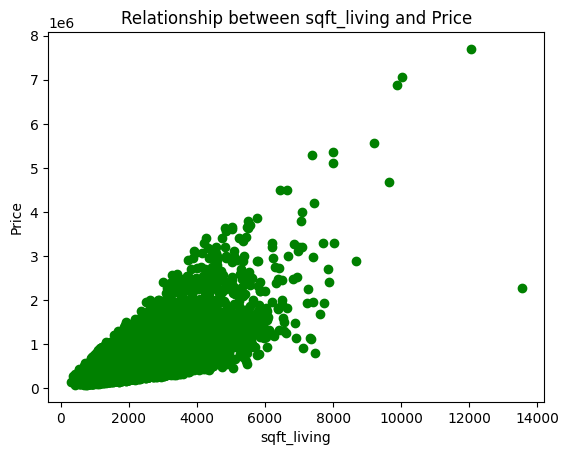

In [ ]:
# Visualize the relationship between price and the chosen input
plt.scatter(x_1, y, color='green')
plt.title('Relationship between sqft_living and Price')
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.show()

**Determine and justify a set of features for polynomial regression**

Mean Squared Error on Model2: 75807750114.81781


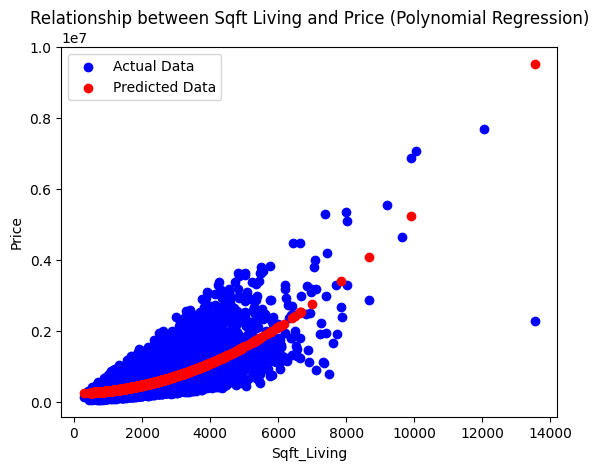

In [ ]:

# Create polynomial features to a degree of 2 using the independent variale x_1.

poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly.fit_transform(x_1)

# Split the data into training and test sets

x_poly_train, x_poly_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=random_state)

# Train a polynomial regression model
poly_model2 = LinearRegression()
poly_model2.fit(x_poly_train, y_train)

# Make predictions on the test set
y_pred = poly_model2.predict(x_poly_test)

# Evaluate the model
mean_Model2_mse = MSE(y_test, y_pred)
print(f"Mean Squared Error on Model2: {mean_Model2_mse}")
# Visualization
plt.scatter(x_1, y, color='blue', label='Actual Data')
plt.scatter(x_poly_test[:, 0], y_pred, color='red', label='Predicted Data')
plt.title(f'Relationship between Sqft Living and Price (Polynomial Regression)')
plt.xlabel('Sqft_Living')
plt.ylabel('Price')
plt.legend()
plt.show()

We will use a quadratic feature (1, x, x^2) since we suspect a parabolic relationship between the input variable and the price. The Polynomial features generate polynomial features up to the second degree (1, x, x^2) based on the chosen feature (sqft_living as x_1). It then fits a linear regression model to the transformed features and evaluates the model's performance. We visualize the scatter plot, and investigate if there is a curvilinear pattern, we try adding a quadratic term (x^2) and investigate whether it might capture the non-linear relationship better.



# **C3. Model 3: Multiple Regression**

We defined the features for the model as **x= features representingthe independent variables['bedrooms','bathrooms','sqft_living','sqft_lot','floors','yr_built','yr_renovated','sqft_living15','sqft_lot15','sqft_basement','sqft_above','grade','lat','long']**


In [ ]:
features=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','yr_built','yr_renovated','sqft_living15','sqft_lot15','sqft_basement','sqft_above','grade','lat','long']
x=Df[features]

In [ ]:
#Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)

In [ ]:
 # we will split the data into training and validation set
 x_train_train, x_train_validation, y_train_train, y_train_validation = train_test_split(x_train, y_train, test_size=0.2, random_state=random_state)

In [ ]:
# Create a Linear Regression model
Model3 = LinearRegression()

In [ ]:
# Initialize variables to keep track of the selected features and the best MSE
selected_features = []
best_mse = []
best_mse_train = []

In [ ]:
# Perform forward feature selection
for _ in range(len(features)):
    # Variables to keep track of the best feature to add and its corresponding MSE
    best_feature_to_add = None
    best_feature_mse = float("inf")

    for feature in features:
        if feature not in selected_features:
            # Copy the current selected features and add the candidate feature
            features_to_evaluate = selected_features + [feature]

            # Train a model with the selected features
            Model3.fit(x_train_train[features_to_evaluate], y_train_train)


            # Make predictions on the validation data
            y_validation_pred = Model3.predict(x_train_validation[features_to_evaluate])

            # Calculate Mean Squared Error
            mse = MSE(y_train_validation, y_validation_pred)

            #-----------------------------------------------------------------------------
            #  we don't need this part of the code, I've added it for visualisation
            #------------------------------------------------------------------------------
            # Make predictions on the training   data
            y_train_pred = Model3.predict(x_train_train[features_to_evaluate])
            mse_train = MSE(y_train_train, y_train_pred)
            #------------------------------------------------------------------------------

            # If this set of features results in a lower MSE, update the best feature and MSE
            if mse < best_feature_mse:
                best_feature_to_add = feature
                best_feature_mse = mse
                best_feature_mse_train = mse_train # for visualisation


    # If adding the best feature improves MSE, add it to the selected features
    if best_feature_to_add is not None:
        selected_features.append(best_feature_to_add)
        best_mse.append(best_feature_mse)
        best_mse_train.append(best_feature_mse_train)

    else:
        # If no feature improves MSE, stop the selection process
        break

In [ ]:
# At the end of the loop, selected_features will contain the best subset of features
print("Selected Features:", selected_features)

Selected Features: ['sqft_living', 'lat', 'grade', 'yr_built', 'bedrooms', 'bathrooms', 'long', 'sqft_living15', 'yr_renovated', 'sqft_lot15', 'floors', 'sqft_basement', 'sqft_above', 'sqft_lot']


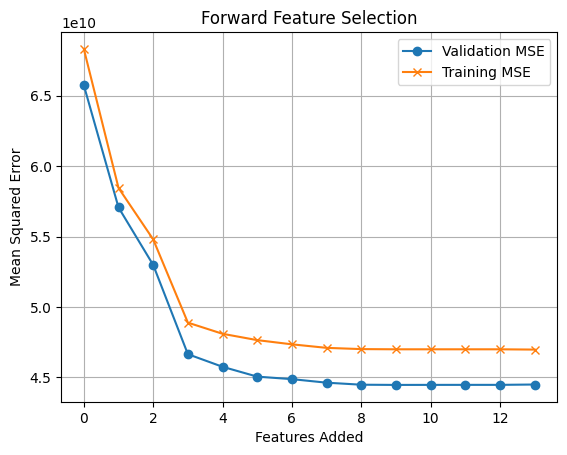

In [ ]:
# Create lists to store the iteration number and corresponding MSE values
iteration_numbers = range(len(selected_features))

# Plot both validation and training MSE
plt.plot(iteration_numbers, best_mse, label='Validation MSE', marker='o')
plt.plot(iteration_numbers, best_mse_train, label='Training MSE', marker='x')

plt.title('Forward Feature Selection')
plt.xlabel('Features Added')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
Model3 = LinearRegression()
# We re-fit the model to the data we have (train and validation).
Model3.fit(x_train[selected_features], y_train)
y_pred3 = Model3.predict(x_test[selected_features])
mean_Model3_mse = MSE(y_test, y_pred3)
mean_Model3_mse

46119160003.015564

# **C4. Model 4: Ridge Regression**


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)

In [ ]:
scaler = StandardScaler(with_mean=False)
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
x_train_train_s, x_train_validation_s, y_train_train, y_train_validation = train_test_split(x_train_scaled, y_train, test_size=0.2, random_state=random_state)


# Create a set of alphas

In [ ]:
  # A range of alpha values
alphas_1 = np.logspace(0, 0.1, 10)
alphas_2 = np.linspace(0.25, 5, 20)
alphas_3 = np.linspace(6, 100, 20)
alphas_4 = np.logspace(2,5, 100)
alphas = np.concatenate((alphas_1,alphas_2,alphas_3,alphas_4), axis=0)

In [ ]:
# Create the RidgeCV object
model4 = RidgeCV(alphas=alphas, cv=5)

# Fit the model
model4.fit(x, y)

# Print the best alpha value
print(f'The best alpha value is {model4.alpha_:.4f}')

The best alpha value is 0.2500


In [ ]:
# Calculate the mean squared error
y_pred4 = model4.predict(x)
mean_Model4_mse = MSE(y, y_pred4)

# Print the mean squared error
print(f'The mean squared error of the ridge regression is {mean_Model4_mse:.4f}')

The mean squared error of the ridge regression is 46383042994.0420


#**C5. Model 5: Your Suggested Model**


My intuition is aligned with a common understanding in real estate: the number of bedrooms is often considered a significant factor in determining the price of a house. In real estate analysis, the number of bedrooms is a key feature used to predict housing prices. More bedrooms generally imply a larger and potentially more valuable property.

Developing a simple regression model with the number of bedrooms as the independent variable and the price as the dependent variable is a reasonable approach.


In [ ]:
#Define the input variable as the number of bedrooms defined as x_2.
x_2 = x['bedrooms'].values.reshape(-1, 1)

# Split the data using k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=random_state)

# Implement simple regression model as Model5
Model5= LinearRegression()

# Evaluate the model using k-fold cross-validation
Model5_scores = cross_val_score(Model5, x_2, y, scoring='neg_mean_squared_error', cv=kf)
mean_Model5_mse = np.mean(-Model5_scores)

# Optimize the model using closed-form (analytical) approach
Model5.fit(x_2, y)
Model5_intercept, Model5_coefficient = Model5.intercept_,Model5.coef_[0]

# Print results
print(" Model 5: Simple Regression")
print(f"Mean Squared Error (k-fold cross-validation): {mean_Model5_mse}")
print(f"Optimized Model: y = {Model5_intercept} + {Model5_coefficient:.2f} * bedrooms\n")


 Model 5: Simple Regression
Mean Squared Error (k-fold cross-validation): 122055082758.38713
Optimized Model: y = 129802.35631825868 + 121716.13 * bedrooms



#**D1.Concepts**

## Illustrate the Learning Rate Selection Process:

Commence Training with a Modest Learning Rate: It is advisable to initiate the training process with a small learning rate. A smaller learning rate facilitates a gradual convergence of the model, reducing the likelihood of overshooting the minimum of the cost function.

Experiment and Fine-Tune: Explore various learning rates during the training process and observe the model's behavior. If the learning rate is too diminutive, the model may take an extended period to converge. Conversely, if it's excessively large, the model may struggle to converge, oscillating around the minimum without reaching it.

Utilize Learning Rate Schedules: Implementing learning rate schedules is a common practice. This involves dynamically adjusting the learning rate over time. Initially, a larger learning rate can expedite the convergence process, and subsequently, a smaller learning rate can be employed for fine-tuning as the model approaches optimal parameters. This approach helps balance efficiency and precision in model training.

## The Advantages of Starting with a Large Learning Rate and Reducing It Iteratively:

Accelerated Convergence Initially: Employing a substantial learning rate empowers the model to cover more ground with larger steps during the initial iterations, expediting the convergence process. This proves advantageous, particularly when the model is distant from the optimal parameters.

Preventing Oscillations: Gradually decreasing the learning rate aids in stabilizing the model as it approaches the optimal parameters. This strategic reduction mitigates the risk of overshooting and oscillations around the minimum, fostering a more controlled and accurate convergence.

# D2. We can Analyse the expected Residual Sum of Squares in Model 1 Using the optimization method


In [ ]:
# Make predictions
# Reshape the input data to a 2D array
sqft_living = x['sqft_living'].values.reshape(-1, 1)
price_pred = Model1.predict(sqft_living)

# Calculate expected residual sum of squares (ERSS)
Model1_erss = np.sum((y - price_pred) ** 2) / len(y)

print("Expected Residual Sum of Squares (ERSS):", Model1_erss)

Expected Residual Sum of Squares (ERSS): 68351286833.039825


This metric serves as an overall assessment of how well the simple regression model fits the data. However, it does not explicitly indicate the specific parameters that lead to the minimum point for the Residual Sum of Squares (RSS). In the context of this regression, the primary objective is to minimize the RSS, which is the sum of squared differences between observed and predicted values. The RSS gauges the model's effectiveness in explaining the variance within the target variable, House Prices.

The RSS is essentially an average of the squared disparities between observed and predicted values. It does not represent the minimum RSS for a particular set of model parameters but rather functions as an evaluative metric for the model's overall performance. To identify the parameters yielding the minimum RSS, this is typically addressed during the model training process. Many simple regression algorithms leverage optimization techniques, like gradient descent, to determine the parameter values that minimize the RSS. Following the training phase, you can then assess the model's efficacy using metrics such as the RSS.


# **D3. Discuss the indicators that help determine if Model 2 is not overfitted.**


To assess the potential overfitting of Model 2 (Polynomial Regression), it is essential to evaluate its performance on both the training and testing sets and scrutinize the learning curves. The objective is to examine whether the model demonstrates robust generalization to unseen data.

# **D4. Explain how you select the best alpha for Model 4.**

In the context of Ridge Regression, grid search involves selecting a range of alpha values and assessing the model's performance through cross-validation. This iterative process encompasses training and validating the model multiple times, each time with a different alpha value. The alpha that minimizes the chosen metric, such as mean squared error (MSE), is then identified as the optimal hyperparameter.

Initiating the grid search entails defining a grid of alpha values to explore. Often, this grid is logarithmically chosen to encompass a diverse range of scales. For each alpha in the grid, the Ridge Regression model undergoes training and evaluation using cross-validation. The performance metric, such as MSE, is recorded for each alpha. The alpha corresponding to the lowest MSE is ultimately recognized as the optimal hyperparameter.

# **D5. Explain the rationale behind your suggestion for Model**

In [ ]:
#Present your suggested model.
print(f'The mean squared error of Model1 is {mean_Model1_mse:.4f}')
print(f'The mean squared error of Model2 is {mean_Model2_mse:.4f}')
print(f'The mean squared error of Model3 is {mean_Model3_mse:.4f}')
print(f'The mean squared error of Model4 is {mean_Model4_mse:.4f}')
print(f'The mean squared error of Model5 is {mean_Model5_mse:.4f}')

The mean squared error of Model1 is 68422325026.1340
The mean squared error of Model2 is 75807750114.8178
The mean squared error of Model3 is 46119160003.0156
The mean squared error of Model4 is 46383042994.0420
The mean squared error of Model5 is 122055082758.3871


#**D6. Evaluate the complexity of the five models**

The mean squared error (MSE) is a common metric used to evaluate the performance of regression models. It measures the average of the squared differences between the observed (actual) values and the predicted values. A lower MSE indicates a better fit of the model to the data.

Model 3 has a lower MSE compared to both Models 1 and 2. A lower MSE is generally indicative of a model that fits the data more closely.

Model 5 has the highest MSE among all the models. This implies larger squared differences between its predicted and actual values, suggesting a potentially poorer fit to the data compared to the other models.

In summary, when comparing these models, you would typically choose the model with the lowest MSE, as it indicates the best overall fit to the data. Models 3 and 4 seem to perform better in terms of MSE compared to Models 1, 2, and 5.


# **E. Model Assessment**

# E1. Predict the test data using all five models and calculate the mean squared error (MSE)

In [ ]:
# We want to Predict the test data using all five models and calculate the mean squared error. We therefore load the test dataset using pandas.

Df2 = pd.read_csv('test_data.csv')
Df2.head(4)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1,20141224T000000,3,1.00,1775,5070,1,0,0,4,7,1561,107,1979,0,98137,47.4915,-122.200,1099,5255
1,2,20141020T000000,4,2.50,1836,18994,2,0,0,3,8,891,47,1981,0,98107,47.6464,-122.328,1140,6726
2,3,20140904T000000,4,1.50,1964,5308,2,0,0,3,7,1785,755,1984,0,98034,47.3048,-122.237,2102,5078
3,4,20140625T000000,4,2.75,1294,4304,0,0,0,3,6,1263,34,2009,0,98077,47.5398,-122.388,2295,26363


##**Model 1: Simple regression using Sqft_Living.**

In [ ]:
# Split the House data into training and test sets in order to train the model. Recall Model1 only investigated the Sqft_living defined as x_1.
#Define the input variable.
t_1= Df['sqft_living'].values.reshape(-1, 1)

t_1_train, t_1_test, y_train, y_test = train_test_split(t_1, y, test_size=511, random_state=random_state)

# Train a regression model using the first data.
Model1.fit(t_1_train, y_train)

#Define the input variable from the test dataset.
tt_1 = Df2['sqft_living'].values.reshape(-1, 1)

# Make predictions on the model using the test data.
y_pred1 = Model1.predict(tt_1)


Model1_test_mse= MSE(y_test, y_pred1)
print(f"Model1 Test Mean Squared Error: {Model1_test_mse}")

Model1 Test Mean Squared Error: 157843833355.60223


## **Model2: Polynomial Model using Sqft_Living to a degree of 2.**

In [ ]:
# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
t_poly = poly.fit_transform(t_1)

# Split the data into training and test sets
t_2_train, t_2_test, y_train, y_test = train_test_split(t_poly, y, test_size=511, random_state=random_state)

# Train a polynomial regression model using the main house dataset.
poly_model2 = LinearRegression()
poly_model2.fit(t_2_train, y_train)

# Make predictions on the test set
tt_poly = poly.fit_transform(tt_1)
y_pred2 = poly_model2.predict(tt_poly)

# Evaluate the model
poly_model2_test_mse = MSE(y_test, y_pred2)
print(f"Poly Model2 Test Mean Squared Error: {poly_model2_test_mse}")

Poly Model2 Test Mean Squared Error: 146026757706.5356


## **Model3:Multiple Regression.**

In [ ]:
print("Selected Features:", selected_features)
D2=Df2
xt=D2[features]
xt

Selected Features: ['sqft_living', 'lat', 'grade', 'yr_built', 'bedrooms', 'bathrooms', 'long', 'sqft_living15', 'yr_renovated', 'sqft_lot15', 'floors', 'sqft_basement', 'sqft_above', 'sqft_lot']


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,yr_renovated,sqft_living15,sqft_lot15,sqft_basement,sqft_above,grade,lat,long
0,3,1.00,1775,5070,1,1979,0,1099,5255,107,1561,7,47.4915,-122.200
1,4,2.50,1836,18994,2,1981,0,1140,6726,47,891,8,47.6464,-122.328
2,4,1.50,1964,5308,2,1984,0,2102,5078,755,1785,7,47.3048,-122.237
3,4,2.75,1294,4304,0,2009,0,2295,26363,34,1263,6,47.5398,-122.388
4,4,2.75,1736,13308,1,1969,0,2095,13990,6,1416,9,47.6888,-122.318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,2,1.00,1285,9291,2,1883,0,1718,15534,96,1428,7,47.4156,-122.396
507,4,1.75,2695,4424,2,1922,0,2542,3924,901,1659,8,47.6916,-122.329
508,3,2.00,1300,1702,1,1899,0,2406,5179,57,1627,8,47.7849,-122.136
509,4,2.25,1547,16442,2,1975,0,1345,9845,174,1795,6,47.4097,-122.097


In [ ]:
# We re-fit the model3 to the test data.
y_pred3 = Model3.predict(D2[selected_features])
Model3_test_mse = MSE(y_test, y_pred3)
print(f"Model3 Test Mean Squared Error: {Model3_test_mse}")

Model3 Test Mean Squared Error: 167685723886.26236


## **Model 4: Ridge Regression.**

In [ ]:
# We re-fit the model4 to the test data.
y_pred4 = model4.predict(xt)
Model4_test_mse = MSE(y_test, y_pred4)
print(f"Model4 Test Mean Squared Error: {Model4_test_mse}")

Model4 Test Mean Squared Error: 168004915061.7806


##**Model 5: My Suggested Model.**

In [ ]:
# Split the House data into training and test sets in order to train the model. Recall Model1 only investigated the number of bedrooms defined as X_2.
#Define the input variable.
t_2= Df['bedrooms'].values.reshape(-1, 1)

t_2_train, t_2_test, y_train, y_test = train_test_split(t_2, y, test_size=511, random_state=random_state)

# Train a regression model using the first data.
Model5 = LinearRegression()
Model5.fit(t_2_train, y_train)

#Define the input variable from the test dataset.
tt_2 = Df2['bedrooms'].values.reshape(-1, 1)

# Make predictions on the model using the test data.
y_pred5 = Model5.predict(tt_2)


Model5_test_mse= MSE(y_test, y_pred5)
print(f"Model5 Test Mean Squared Error: {Model5_test_mse}")

Model5 Test Mean Squared Error: 126977715519.19524


# E2:Determine which model performs the best and provide an explanation.

In [ ]:
print(f'The mean squared error of Model1_Testdata is {Model1_test_mse:.4f}')
print(f'The mean squared error of Model2_Testdata is {poly_model2_test_mse:.4f}')
print(f'The mean squared error of Model3_Testdata is {Model3_test_mse:.4f}')
print(f'The mean squared error of Model4_Testdata is {Model4_test_mse:.4f}')
print(f'The mean squared error of Model5_Testdata is {Model5_test_mse:.4f}')

The mean squared error of Model1_Testdata is 157843833355.6022
The mean squared error of Model2_Testdata is 146026757706.5356
The mean squared error of Model3_Testdata is 167685723886.2624
The mean squared error of Model4_Testdata is 168004915061.7806
The mean squared error of Model5_Testdata is 126977715519.1952


The mean squared error (MSE) is a measure of how close a regression line is to a set of points. It is calculated by taking the average of the squared differences between the predicted values and the true values. A lower MSE indicates a better fit of the regression line to the data.

In this case,we had five different models (Model1, Model2, Model3, Model4, and Model5) to which we calculated the mean squared error (MSE) for each of them using test data provided. The MSE values generated indicate the average squared difference between the predicted values and the true values for each model. A lower MSE value indicates that the model is better at predicting the target variable (the house price).

The MSE for Model 5 on the test dataset is the lowest among all the models. This indicates that, on average, Model 5 has predictions that are closer to the true values on the test data, suggesting better generalization compared to the other models.

However, you should also consider other factors such as the complexity of the model, the interpretability of the results, and the assumptions of the regression analysis before making a final decision.


# **F. Model Suggestion for Unlabelled Data**

# F1. Recommend one of the five models for application to unlabelled data and elucidate the reasons behind your choice

The evaluation of the models on the test data reveals that Model5_Testdata stands out as the top performer, exhibiting the lowest mean squared error (MSE). This implies that Model5 generalizes well to new, unseen data.

Model2_Testdata also demonstrates a reasonable level of performance, suggesting that the polynomial regression model with degree 2 features is effective on the test set.

**Recommendation:**

Based on the MSE values observed on the test data, the recommendation is to prioritize the use of Model5 for application to unlabeled data. It has showcased superior performance in terms of mean squared error on the test set, indicating better generalization to new data. It's important to note that this recommendation is founded on MSE as the evaluation metric, and additional factors such as model complexity, interpretability, and specific requirements of your problem should be taken into consideration when making a final decision


# F2. Apply your selected model to the unlabelled dataset, create a ”predicted price” column

The suggested model, Model5, was trained to forecast house prices based on the 'bedroom' feature, representing the number of bedrooms in houses. To extend these predictions to an unlabeled dataset, we gathered a sample of 5000 records from a real estate site, encompassing various house features, including the number of bedrooms.

Using the 'bedroom' feature from this unlabeled dataset, Model5 will generate predictions for house prices. The outcome of this process is an array of predicted prices, denoted as predicted_prices


In [ ]:
print(selected_features)

['sqft_living', 'lat', 'grade', 'yr_built', 'bedrooms', 'bathrooms', 'long', 'sqft_living15', 'yr_renovated', 'sqft_lot15', 'floors', 'sqft_basement', 'sqft_above', 'sqft_lot']


In [ ]:
# Set a seed for reproducibility
np.random.seed(random_state)

# Generate random data for features
features = {'grade': np.random.randint(1,10, size=5000),
            'lat': np.random.randn(5000),
            'long': np.random.randn(5000),
    'bedrooms': np.random.randint(1, 20, size=5000),  # Random integer between 1 and 9
    'sqft_basement': np.random.randint(900,100000,size=5000),
            'condition' : np.random.randint(1, 5, size=5000),
'yr_built' : np.random.randint(1900, 2023, size=5000),
'yr_renovated' : np.random.randint(1900, 2023, size=5000),
'zipcode' : np.random.randint(98001, 98199, size=5000),
    'sqft_above': np.random.randint(900,50000,size=5000),
    'sqft_lot': np.random.randint(900,50000,size=5000),
    'sqft_living': np.random.randint(90000,50000000,size=5000),
    'bathrooms': np.random.randint(1,20,size=5000),
    'floors': np.random.randint(1,10,size=5000),
            'sqft_living15' : np.random.randint(900, 50000, size=5000),
'sqft_lot15' : np.random.randint(900, 50000, size=5000)}
# Create a DataFrame from the generated features
unlabeled_data = pd.DataFrame(features)

#Display the first few rows of the unlabeled data
print(unlabeled_data.head())
data3=unlabeled_data

finalx= data3['bedrooms'].values.reshape(-1, 1)

# Make predictions on the unlabelled dataset
y_pred_final = Model5.predict(finalx)

# Reshape predictions generated by the model
predicted_price = y_pred_final.reshape(-1, 1)

# Add the predicted price column to the unlabelled dataset
unlabeled_data['predicted_price'] = predicted_price
print(unlabeled_data.head(10))
# Save the unlabeled data to a CSV file
unlabeled_data.to_csv('500715647.csv', index=False)

   grade       lat      long  bedrooms  sqft_basement  condition  yr_built  \
0      8  1.449660  1.520938        17          39617          4      1987   
1      7 -1.360568 -1.449533         7          75462          3      2022   
2      8  0.593646 -0.064142        13          11295          4      1937   
3      9  0.533125  0.845145         4          76310          3      1912   
4      9 -0.758145  2.741450        19          63143          1      1965   

   yr_renovated  zipcode  sqft_above  sqft_lot  sqft_living  bathrooms  \
0          1958    98186       25228     31083     12360956         16   
1          1958    98004        6325     31392     37924178         16   
2          1978    98063       29500     38219     34545254         15   
3          2007    98179       37051     42814     44725806         12   
4          1935    98059       11669     31957     18859663         10   

   floors  sqft_living15  sqft_lot15  
0       6          47305       46414  
1       